In [5]:
import os
import datetime
import pygrib
import pickle
import numpy as np
import pygrib
import matplotlib.pyplot as plt

import cartopy.crs as ccrs

def _getting_valid_matrix(series, time):
    # There are two types of matrix, matrix with values or masked matrix, 
    # masked matrix should be filled with -999.0, like no valid data.
    # if it is VIL, then we will fill it with 0.0, 
    # cloudtop, we will fill it with -999.0
    if type(series[time]) == np.ma.core.MaskedArray:
        name = series["name"]
        if name == "VIL":
            retn = series[time].filled(-999.0)
        if name == "cloudtop":
            retn = series[time].filled(0.0)     
    else: 
        retn = series[time]

    return retn

def series_show(series):
    for i in range(12):
        fig, axs = plt.subplots(1,8,figsize=(15,15), subplot_kw={'projection': ccrs.PlateCarree()})
        for j in range(8):
            axs[j].coastlines()
            time = (i*2 + j//4)*100 + j%4*15
            try:
                mat = _getting_valid_matrix(series,time)
                if series["name"] == "Density":
                    shw = axs[j].imshow(mat,vmin=0, vmax=5)
                else:
                    shw = axs[j].imshow(mat)
                axs[j].set_title('{}_{:<4}'.format(series["name"],time))
            except:
                print('\x1b[6;30;41m'+ f"Warning: Not found the data at {time}. Please contact with the author."+'\x1b[0m')
        fig.subplots_adjust(right=0.85)
        cbar_ax = fig.add_axes([0.88, 0.47, 0.02, 0.07])
        fig.colorbar(shw, cax=cbar_ax)
        plt.show()

def generate_VIL_density_matrix(cloudtop,VIL):
    VIL_density = {}
    VIL_density["name"]="Density"
    for i in range(24):
        for j in [0,15,30,45]:
            time = i*100+j
            # Checking
            try:
                #Verifying the shape is correct
                if (VIL[time].shape != (100,100)) or (cloudtop[time].shape != (100,100)):
                    print('\x1b[6;30;41m'+ "Warning: The shape of VIL or cloudtop is wrong!"+'\x1b[0m')
            except:
                print('\x1b[6;30;41m'+ f"Warning: the data of VIL or cloudtop at {time} is lost."\
                      +'\x1b[0m')
            #filling the mask matrix
            cloudtop_mat = _getting_valid_matrix(cloudtop,time)
            VIL_mat = _getting_valid_matrix(VIL,time)
            VIL_density[time]= VIL_mat/cloudtop_mat
    return VIL_density
cur_location = os.getcwd()

Step1: put this notebook under the same folder with "/hrrrdata", and then use the following codes to load the data on a certain day.

In [6]:
with open(cur_location+'/hrrr2019-09-01.dat','rb') as f:
    (cloudtop, VIL, names) = pickle.load(f)
    # self check
    if len(set(names))!= 2:
        print('\x1b[6;30;41m'+ "Warning: The data is not correct, Because either cloudtop or VIL is lost!"+'\x1b[0m')
    cloudtop["name"] = "cloudtop"
    VIL["name"] = "VIL"

Step2: The VIL_density matrix is defined via the elementwise fractions between matrix VIL and cloudtop.
Using the following code can generate VIL_density dictionary.

/Users/thinhhoang/miniforge3/envs/traffic/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


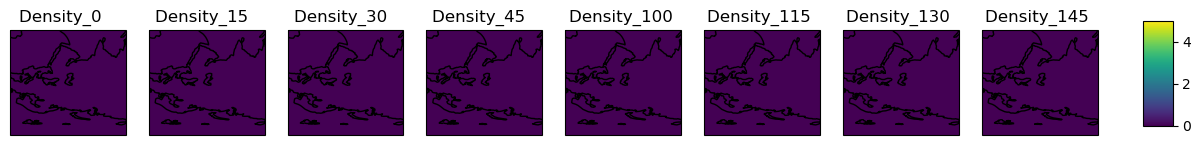

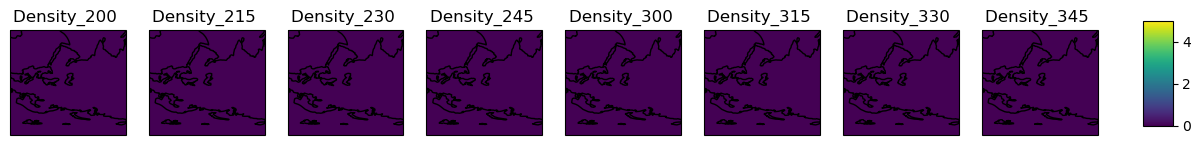

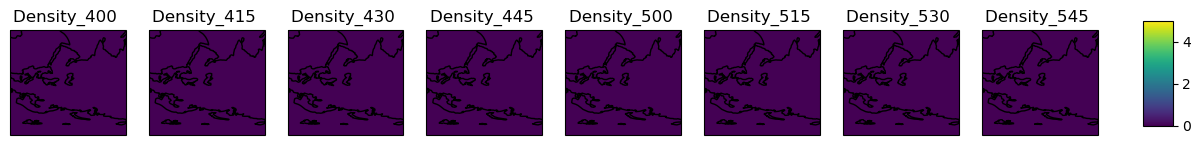

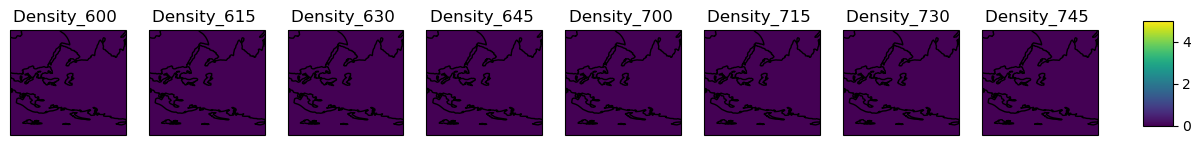

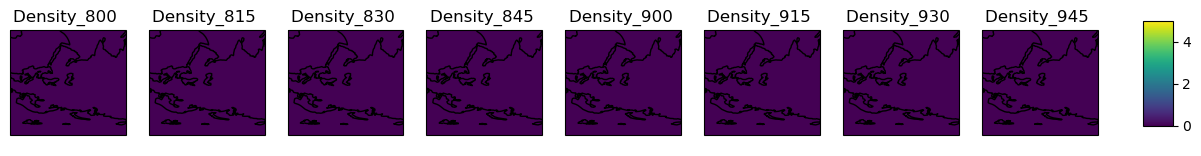

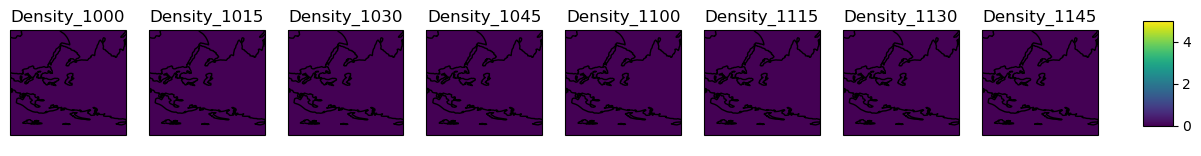

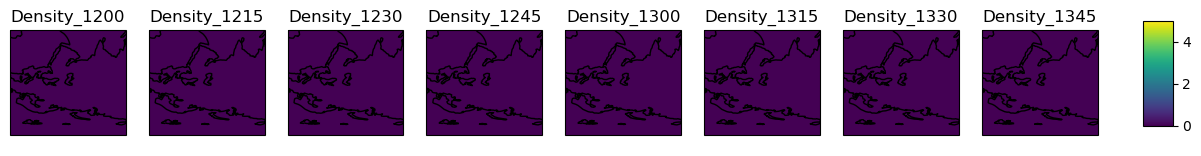

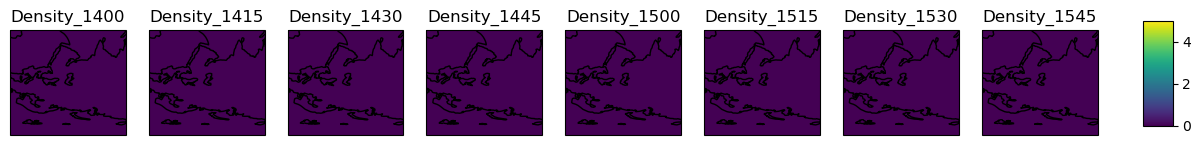

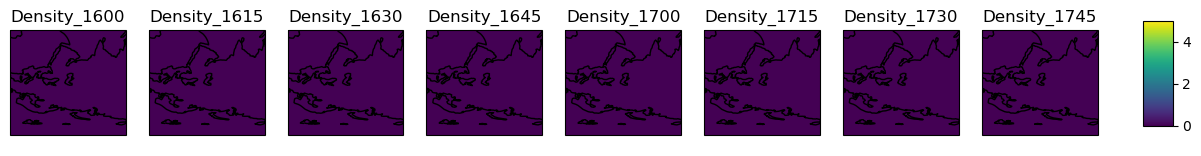

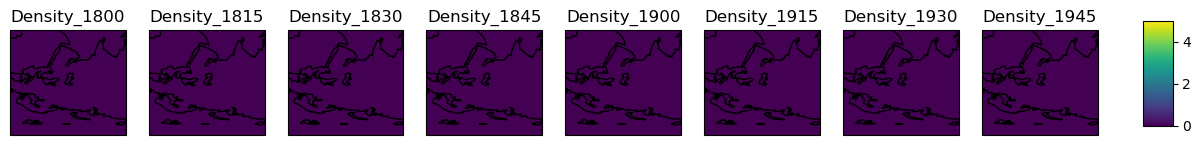

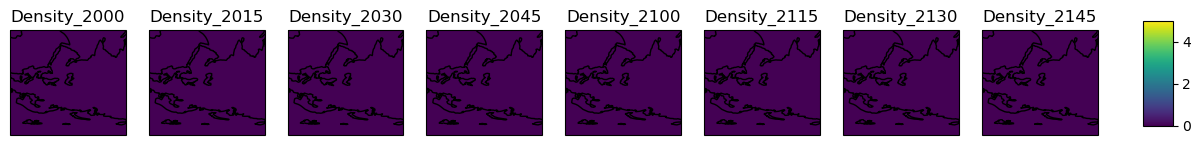

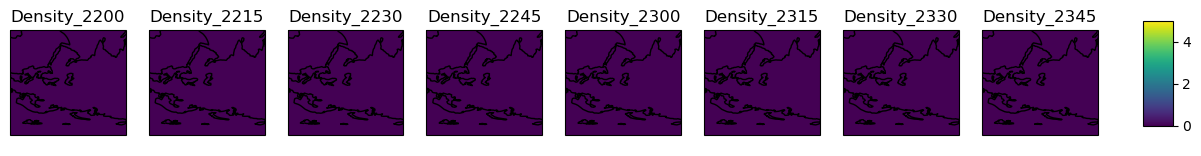

In [8]:
VIL_density = generate_VIL_density_matrix(cloudtop,VIL)
series_show(VIL_density)

Step3: use the function series_show to show the cloudtop or VIL.

In [ ]:
VIL[0].max()

0.008

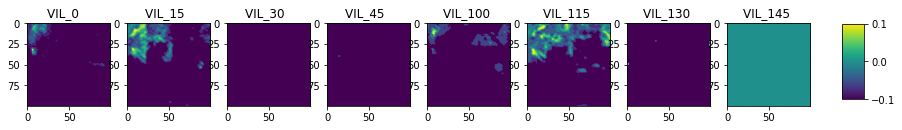

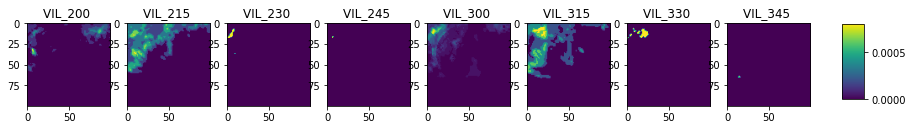

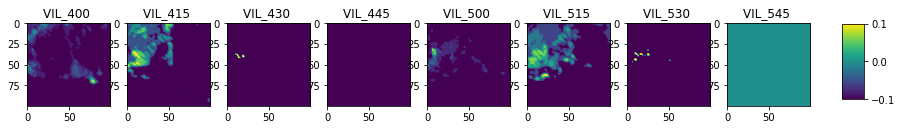

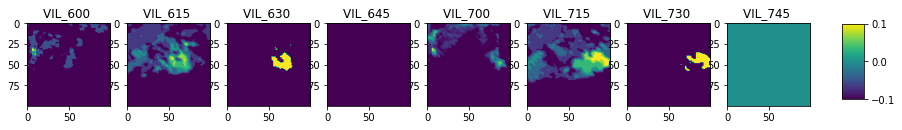

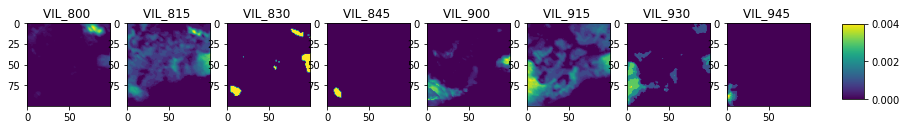

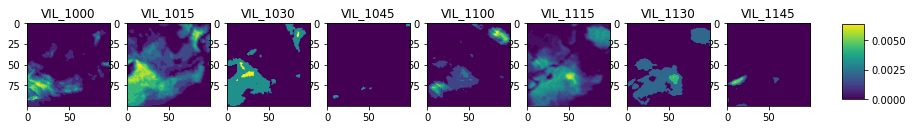

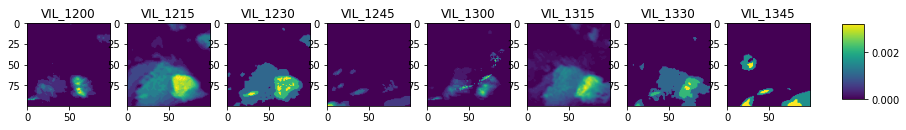

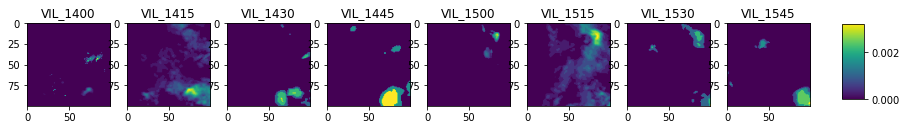

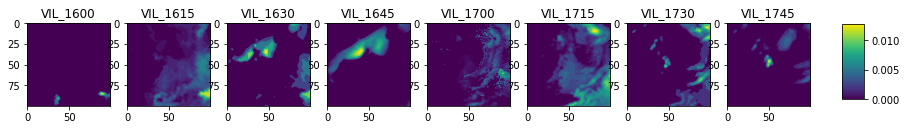

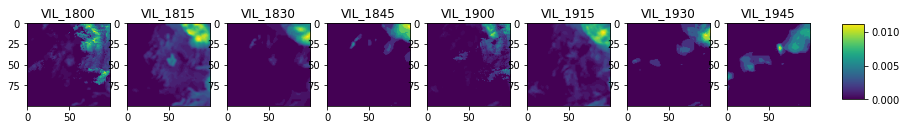

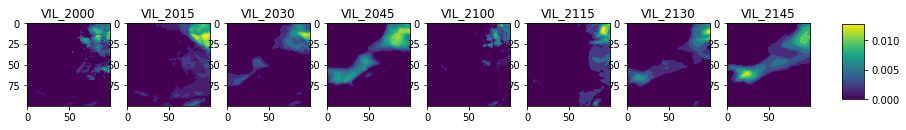

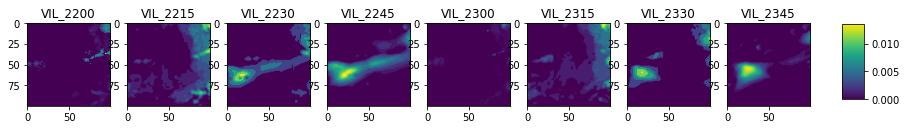

In [ ]:
series_show(VIL)

Step 4. Get the Maximum series:

In [ ]:
def Max_series(series):
    sequence = {}
    for i in range(24):
        for j in [0,15,30,45]:
            time = i*100+j
            mat = _getting_valid_matrix(series,time)
            sequence[time]=mat.max()
    return sequence

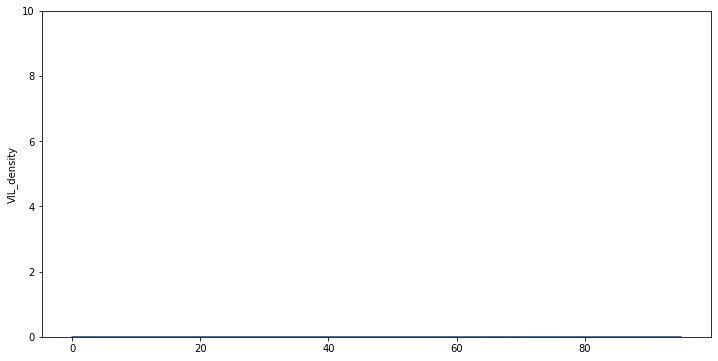

In [ ]:
density_sequence = Max_series(VIL_density)
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(density_sequence.values())
plt.ylabel('VIL_density')
plt.ylim([0, 10])
plt.show()

In [ ]:
density_sequence.values()

dict_values([9.594682465139802e-05, 0.00012946544854664906, 0.0002470275684856932, 0.00027662493568856114, 8.635940714725655e-05, 0.0001339457280779866, 0.00021567980598625143, 0.00014553702216131927, 8.125302615725883e-05, 0.00011106556204894511, 0.00014176698293622564, 0.00014186761106192385, 0.0001030965315937633, 0.00016987149904111416, 0.0002280622399131536, 0.0002887220798242402, 0.00017721680779677262, 0.00027948662170981076, 0.00022408722947298858, 0.00017601028655400442, 0.000192489318641781, 0.00023099246501614643, 0.00031271937155273274, 0.00026196335794366964, 0.00026773122411670333, 0.00031674538860008956, 0.00022033972315619409, 0.0003313059033989267, 0.00018232129131437358, 0.00027237820974322055, 0.00035576789275940443, 0.00014195098510331571, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0

Last step. If there are some abnormal data, please use names to check.
The correct result should be as follows.

In [ ]:
names

['unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'Vertically-integrated liquid',
 'unknown',
 'Vertically-integrated liquid',
 'unknown',
 'unknown',
 'unknown',
 'Vertically-integr